Using TensorFlow backend.


(50000, 784) (50000,)


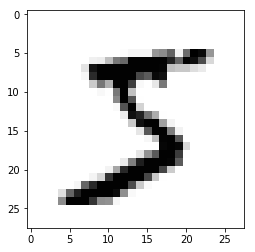

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0].reshape((28, 28)), cmap="Greys");

In [2]:
import tensorflow as tf
import numpy as np
import sys
from sklearn.metrics import accuracy_score
print("Tensorflow version:- ",tf.__version__)

Tensorflow version:-  1.2.1


In [3]:
print("Train data stats | input data shape :- {} | output data shape :- {}".format(X_train.shape, y_train.shape))
print("Validation data stats | input data shape :- {} | output data shape :- {}".format(X_val.shape, y_val.shape))
print("Validation data stats | input data shape :- {} | output data shape :- {}".format(X_test.shape, y_test.shape))


num_hidden_units_layer1 = 500
num_hidden_units_layer2 = 10
num_features = X_train.shape[1]
num_classes = 10

# Conversion to One-Hot encoded
y_train = (np.arange(num_classes) == np.array(y_train)[:,None]).astype(np.float32)
y_val = (np.arange(num_classes) == np.array(y_val)[:,None]).astype(np.float32)
y_test = (np.arange(num_classes) == np.array(y_test)[:,None]).astype(np.float32)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

Train data stats | input data shape :- (50000, 784) | output data shape :- (50000,)
Validation data stats | input data shape :- (10000, 784) | output data shape :- (10000,)
Validation data stats | input data shape :- (10000, 784) | output data shape :- (10000,)
(50000, 10)
(10000, 10)
(10000, 10)


In [89]:
# Input and Output definition
input_X = tf.placeholder(tf.float32, shape=[None, num_features])
input_y = tf.placeholder(tf.float32, shape=[None, num_classes])
print("Input X :- {}".format(input_X))
print("Input Y :- {}".format(input_y))


initializer = tf.contrib.layers.xavier_initializer(seed=42)
# First hidden layer 
weight1 = tf.Variable(initializer([num_features, num_hidden_units_layer1]))
#     tf.truncated_normal(shape=(num_features, num_hidden_units_layer1)))
bias1 = tf.Variable(tf.truncated_normal(shape=[1, num_hidden_units_layer1]))
print("for 1st layer")
print("Weight :- {}".format(weight1))
print("bias:- {}".format(bias1))

# Second hidden layer
weight2 = tf.Variable(initializer([num_hidden_units_layer1, num_hidden_units_layer2]))
#     tf.truncated_normal(shape=(num_hidden_units_layer1, num_hidden_units_layer2)))
bias2 = tf.Variable(tf.truncated_normal(shape=[1, num_hidden_units_layer2]))
print("for 2nd layer")
print("Weight :- {}".format(weight2))
print("bias:- {}".format(bias2))

a1 = tf.nn.relu(tf.add(tf.matmul(input_X, weight1), bias1))

predicted_y = tf.nn.softmax(tf.add(tf.matmul(a1, weight2), bias2))
print("Output predicted tensor:- ", predicted_y)

loss = tf.losses.softmax_cross_entropy(input_y, predicted_y)
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=predicted_y))
print("Loss tensor :- ", loss)

optimizer = tf.train.AdamOptimizer().minimize(loss, var_list=[weight1, bias1, weight2, bias2])

print("Optimizer tensor :- ", optimizer)


Input X :- Tensor("Placeholder_54:0", shape=(?, 784), dtype=float32)
Input Y :- Tensor("Placeholder_55:0", shape=(?, 10), dtype=float32)
for 1st layer
Weight :- <tf.Variable 'Variable_100:0' shape=(784, 500) dtype=float32_ref>
bias:- <tf.Variable 'Variable_101:0' shape=(1, 500) dtype=float32_ref>
for 2nd layer
Weight :- <tf.Variable 'Variable_102:0' shape=(500, 10) dtype=float32_ref>
bias:- <tf.Variable 'Variable_103:0' shape=(1, 10) dtype=float32_ref>
Output predicted tensor:-  Tensor("Softmax_2657:0", shape=(?, 10), dtype=float32)
Loss tensor :-  Tensor("softmax_cross_entropy_loss_24/value:0", shape=(), dtype=float32)
Optimizer tensor :-  name: "Adam_5"
op: "NoOp"
input: "^Adam_5/update_Variable_100/ApplyAdam"
input: "^Adam_5/update_Variable_101/ApplyAdam"
input: "^Adam_5/update_Variable_102/ApplyAdam"
input: "^Adam_5/update_Variable_103/ApplyAdam"
input: "^Adam_5/Assign"
input: "^Adam_5/Assign_1"



In [90]:
epochs = 100
mini_batch_size = 256
training_loss = []
validation_loss = []
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
for i in range(epochs):
    for counter, j in enumerate(np.arange(0, X_train.shape[0], mini_batch_size)):
        if j + mini_batch_size < X_train.shape[0]:
            indices = np.arange(j, j + mini_batch_size, 1)
        else:
            indices = np.arange(j, X_train.shape[0], 1)
        X_batch = X_train[indices, :]
        y_batch = y_train[indices, :]
        sess.run(optimizer, {input_X: X_batch, input_y: y_batch})
    loss_i = sess.run(loss, {input_X: X_batch, input_y: y_batch})
    training_loss.append(loss_i)
    train_pred = sess.run(tf.argmax(tf.nn.softmax(predicted_y), axis=1), 
                          feed_dict={input_X:X_train, input_y: y_train})
    val_pred = sess.run(tf.argmax(tf.nn.softmax(predicted_y), axis=1), 
                        feed_dict={input_X:X_val, input_y: y_val})
    train_acc = accuracy_score(np.argmax(y_train, axis=1), train_pred)
    val_acc = accuracy_score(np.argmax(y_val, axis=1), val_pred)
    if i % 10 == 0:
        print("For Epoch {}...".format(i, epochs))
        print("Train Accuracy:- {} || Validation Accuracy :- {}".format(train_acc, val_acc))

print("Model Training completed !!!")
print("Getting the Test Accuracy")
test_pred = sess.run(tf.argmax(tf.nn.softmax(predicted_y), axis=1), 
                      feed_dict={input_X:X_test, input_y: y_test})
test_acc = accuracy_score(np.argmax(y_test, axis=1), test_pred)
print("Test Accuracy :- {}".format(test_acc))

For Epoch 0...
Train Accuracy:- 0.92174 || Validation Accuracy :- 0.9274
For Epoch 10...
Train Accuracy:- 0.98148 || Validation Accuracy :- 0.9708
For Epoch 20...
Train Accuracy:- 0.98936 || Validation Accuracy :- 0.9744
For Epoch 30...
Train Accuracy:- 0.99274 || Validation Accuracy :- 0.9775
For Epoch 40...
Train Accuracy:- 0.99378 || Validation Accuracy :- 0.9781
For Epoch 50...
Train Accuracy:- 0.99522 || Validation Accuracy :- 0.9786
For Epoch 60...
Train Accuracy:- 0.99564 || Validation Accuracy :- 0.9794
For Epoch 70...
Train Accuracy:- 0.99202 || Validation Accuracy :- 0.9761
For Epoch 80...
Train Accuracy:- 0.99624 || Validation Accuracy :- 0.9823
For Epoch 90...
Train Accuracy:- 0.99644 || Validation Accuracy :- 0.9814
Model Training completed !!!
Getting the Test Accuracy
Test Accuracy :- 0.9805


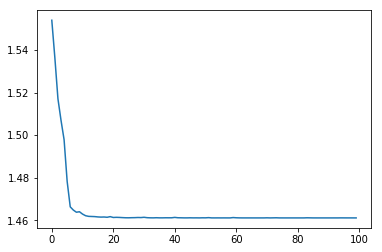

In [91]:
plt.plot(training_loss)
plt.show()